# 2. Discrete Node Plotting - plot_discrete_nodes() Function Examples
## See <span style="color:dodgerblue"> 1.4</span> for already covered arguments

## <span style="color:dodgerblue"> Import Libraries </span>

In [1]:
import visnet010 as vis
import matplotlib.pyplot as plt
import os

## <span style="color:dodgerblue"> Runs Network EPANET simulation, and stores necessary information about network into a dataframe </span>

In [2]:
#Initialize model
model = vis.initialize_model('Networks\CTown.inp')

#Define the file path for images. By default, this is the location where the python file is located.
#Because of how Jupyter Notebook works, a relative path from the notebook can not be obtained.
cwd = os.getcwd()
model['image_path'] = cwd + '\Images'

## <span style="color:dodgerblue"> 2.1 Creating a Discrete Nodes Plot </span>

### The only required argument is parameter. Without specifying parameter, an empty plot will be created. 

### The arguments get_tanks and get_reservoirs control whether the data for these elements are collected or not. Sometimes the datapoints for tanks/reservoirs can be significantly different from normal junctions, resulting in all junctions being put in one bin, while tanks/reservoirs are put in another. By default, get_tanks and get_reservoirs are set to False.

### The arguments tanks, reservoirs, pumps, valves determine if these elements are drawn or not.

### The unit argument can be used to convert to other units.

### 'base_demand', 'elevation', 'emitter_coefficient', and 'initial_quality' are the possible inputs that can be taken with only the parameter argument.

### <span style="color:mediumseagreen"> 2.1.1 Specifying parameter Argument

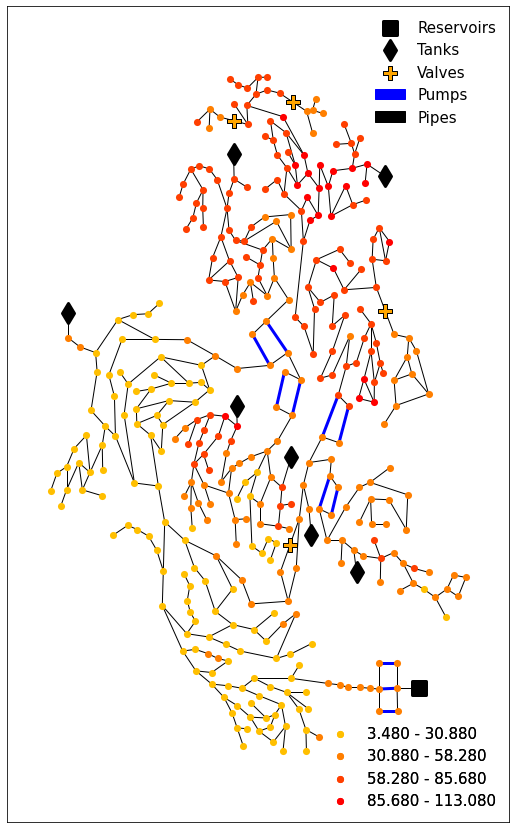

In [3]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation.
vis.plot_discrete_nodes(model, ax, parameter='elevation')

### <span style="color:mediumseagreen"> 2.1.2 Using tanks, reservoirs, pumps, valves Arguments

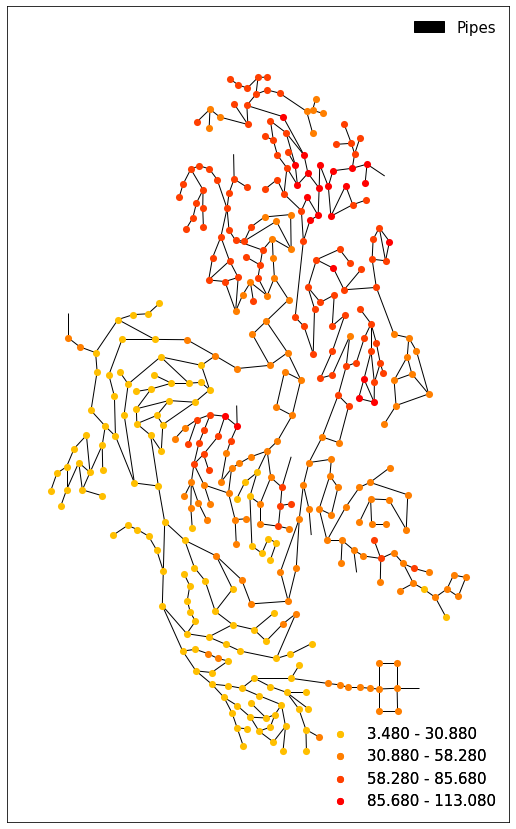

In [4]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation. Doesn't draw reservoirs, tanks, pumps or valves
vis.plot_discrete_nodes(model, ax, parameter='elevation',reservoirs=False,tanks=False, pumps=False, valves=False)

### <span style="color:mediumseagreen"> 2.1.3 Using get_tanks and get_reservoirs Arguments

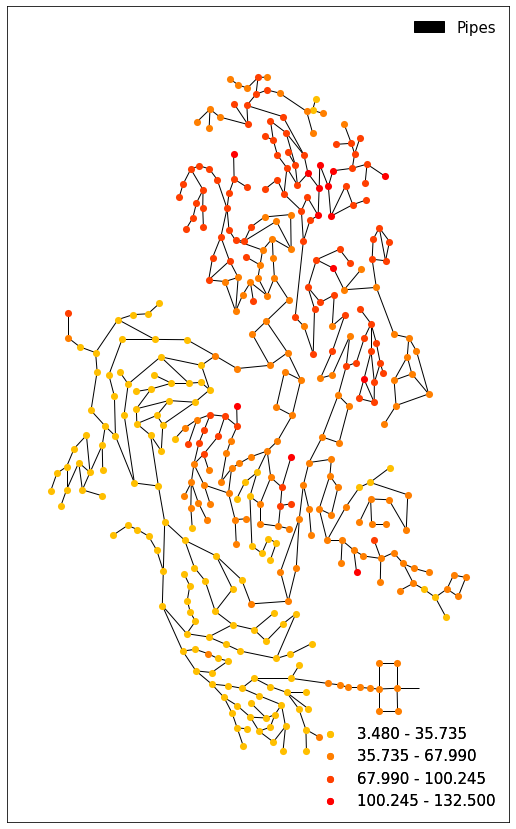

In [5]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation. Doesn't draw reservoirs, tanks, pumps or valves but does collect 
#tanks/reservoir datapoints
vis.plot_discrete_nodes(model, ax, parameter='elevation',reservoirs=False,tanks=False, pumps=False, valves=False, 
                        get_tanks=True, get_reservoirs=True)

### <span style="color:mediumseagreen"> 2.1.4 Using unit Argument

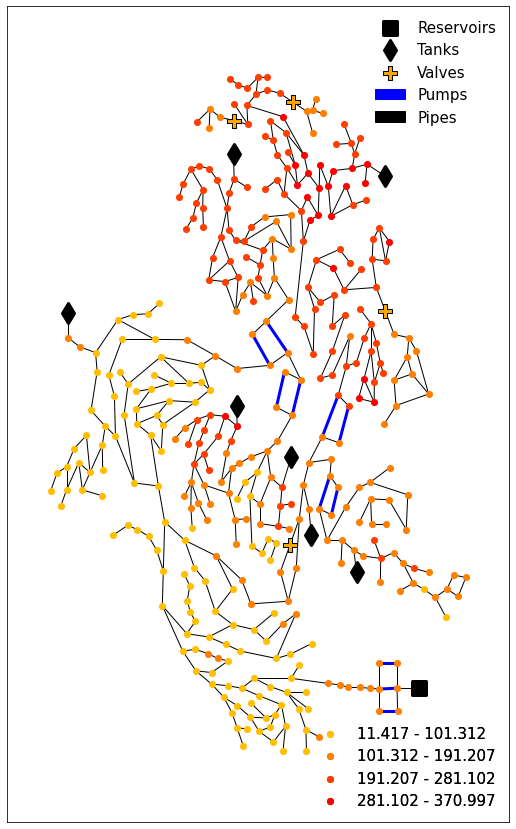

In [6]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation in feet. 
vis.plot_discrete_nodes(model, ax, parameter='elevation', unit='ft')

## <span style="color:dodgerblue"> 2.2 Creating a Discrete Nodes Plot - Value Argument Parameters
    
### Some parameters require an additional argument to be set. This argument is called value and can take an integer which represents the timestep, 'max', 'min', or 'mean'. 
    
### 'head', 'demand', 'leak_demand', 'leak area', 'leak_discharg_coeff', and 'quality' are the possible inputs that can be taken when both parameter and value are used.

### <span style="color:mediumseagreen"> 2.2.1 Using Timestep Input

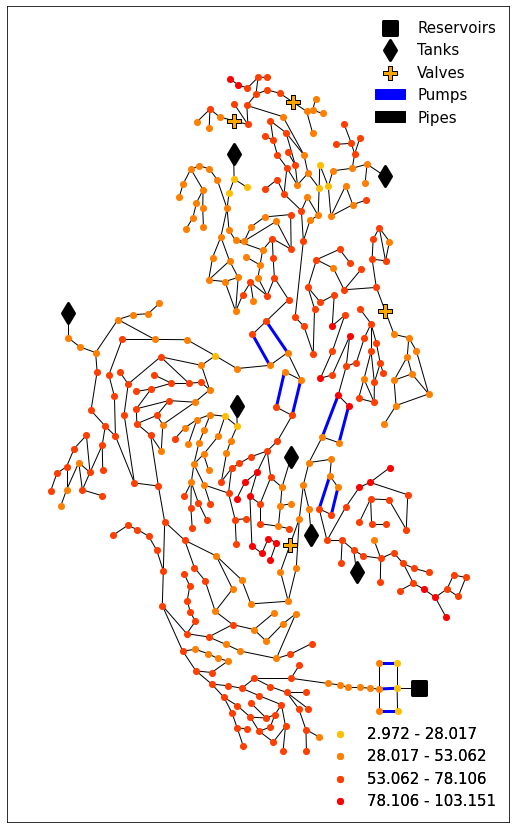

In [7]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of pressure at timestep 6.
vis.plot_discrete_nodes(model, ax, parameter='pressure', value=6)

### <span style="color:mediumseagreen"> 2.2.2 Using 'max' Input

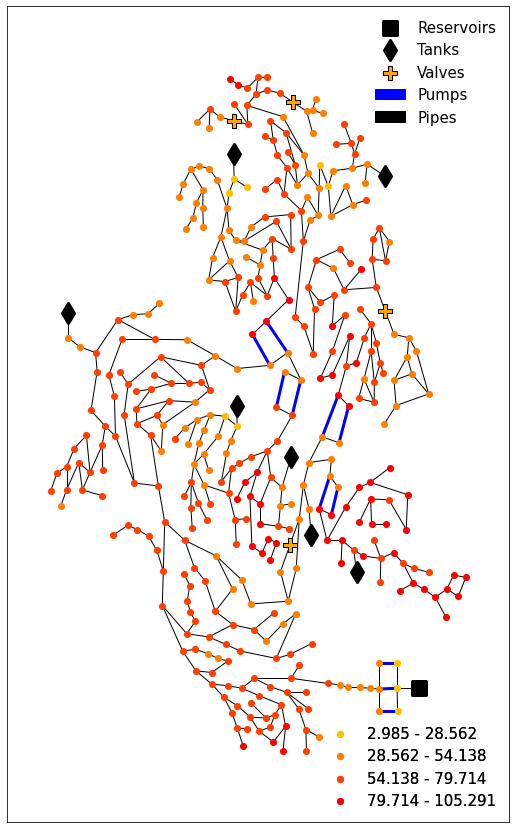

In [8]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of max pressure over all timesteps.
vis.plot_discrete_nodes(model, ax, parameter='pressure', value='max')

### <span style="color:mediumseagreen"> 2.2.3 Using 'min' Input

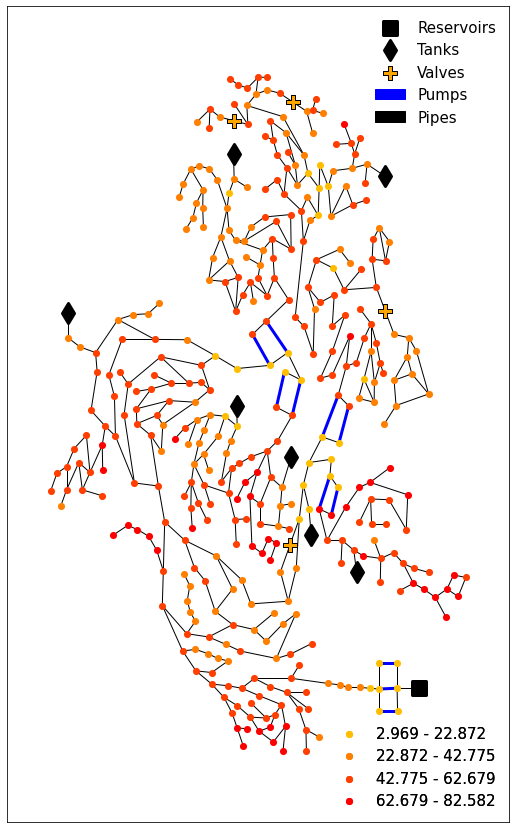

In [9]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of min puressure over all timesteps.
vis.plot_discrete_nodes(model, ax, parameter='pressure', value='min')

### <span style="color:mediumseagreen"> 2.2.4 Using 'mean' Input

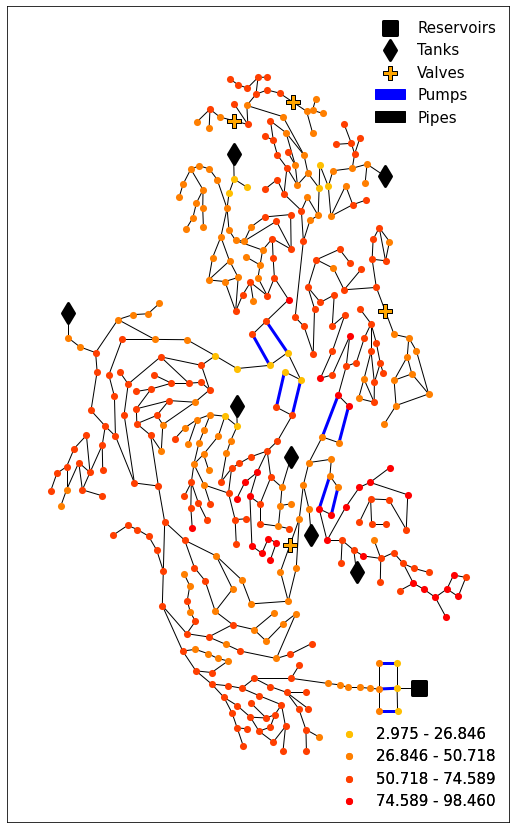

In [10]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of mean puressure over all timesteps.
vis.plot_discrete_nodes(model, ax, parameter='pressure', value='mean')

## <span style="color:dodgerblue"> 2.3 Creating a Discrete Nodes Plot - Bin Edges

### By Default, the function will group the data into 5 bin edges, resulting in 4 distinct bins. This can be changed with the argument bin_edge_num.
    
### The argument bins is by default set to 'Automatic' and as a result, the function will automatically create the specified number of bin_edges. By setting the argument bins to an array of values, one can specify the exact bin edges one wants to use. The length of the array must be equal to bin_edge_num. One thing to take notice to is that the function will automatically create new bin edges if the specified bin edges does not contain all datapoints.
    
### <span style="color:mediumseagreen"> 2.3.1 Setting bin_edge_num Argument

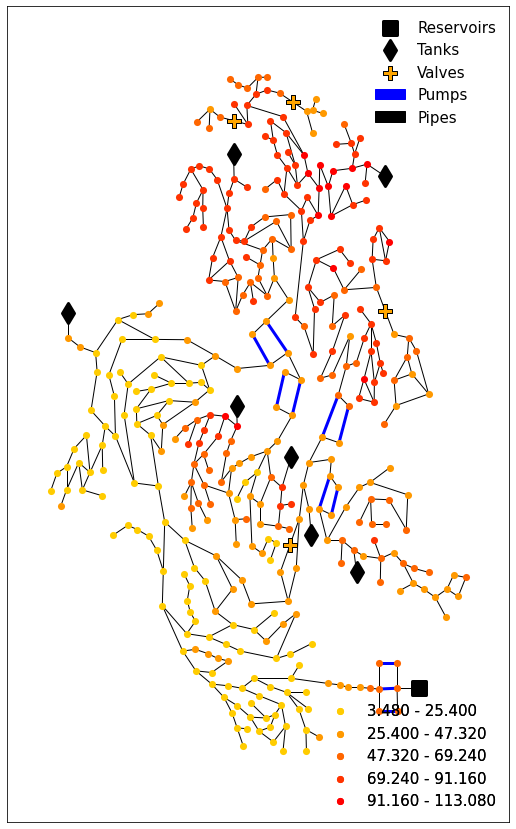

In [11]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation with 6 bin edges.
vis.plot_discrete_nodes(model, ax, parameter='elevation', bin_edge_num=6)

### <span style="color:mediumseagreen"> 2.3.2 Specifying Custom Bin Edges

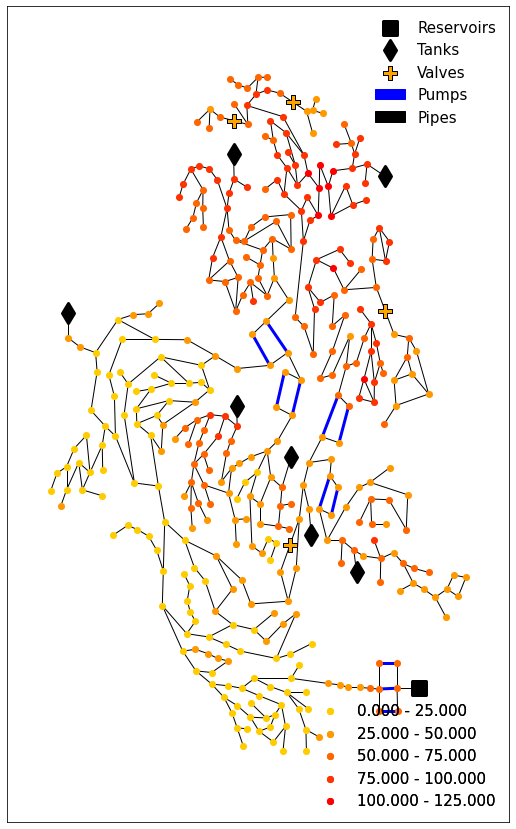

In [12]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation with 6 bin edges and custom bin_edges.
vis.plot_discrete_nodes(model, ax, parameter='elevation',bin_edge_num=6,bins=[0,25,50,75,100,125])

## <span style="color:dodgerblue"> 2.4 Creating A Discrete Nodes Plot - Marker Customization Options
    
### The arguments bin_size_list, bin_shape_list, bin_border_list, bin_border_width_list, and bin_label_list are all marker/bin customization options available.
    
### Each of these arguments should be arrays, and the array length should equal to one less than the *actual* number of bin edges. Normally, this will be equal to the argument bin_edge_num, however, if custom bin edges are specified this may change if any datapoint does not fall into the custom bin edges provided.
    
### <span style="color:mediumseagreen"> 2.4.1 Using bin_size_list Argument

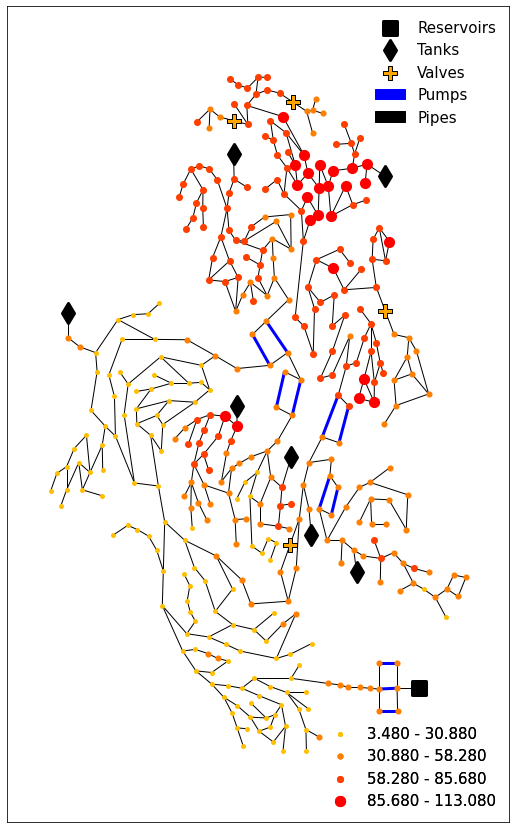

In [13]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation with custom node sizes.
vis.plot_discrete_nodes(model, ax, parameter='elevation', bin_size_list=[100,150,200,500])

### <span style="color:mediumseagreen"> 2.4.2 Using bin_shape_list Argument

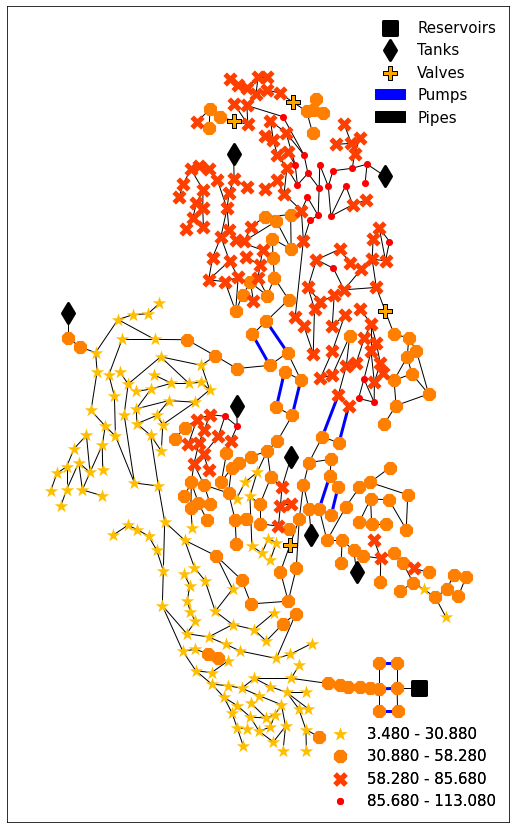

In [14]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation with custom node markers.
vis.plot_discrete_nodes(model, ax, parameter='elevation', bin_shape_list=['*','8','X','.'])

### <span style="color:mediumseagreen"> 2.4.3 Using bin_border_list and bin_border_width_list Arguments

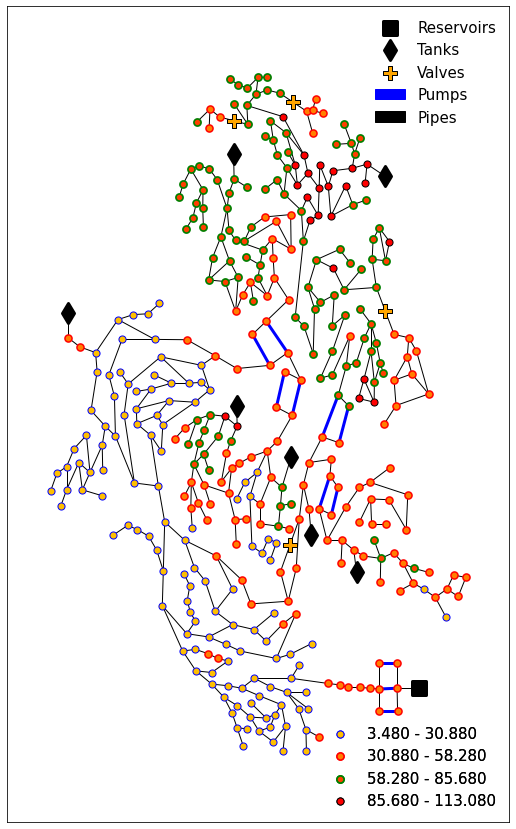

In [15]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation with custom node borders.
vis.plot_discrete_nodes(model, ax, parameter='elevation', bin_border_list=['b','r','g','k'], 
                                                          bin_border_width_list=[1,1.5,1.7,1])

### <span style="color:mediumseagreen"> 2.4.4 Using bin_label_list Argument

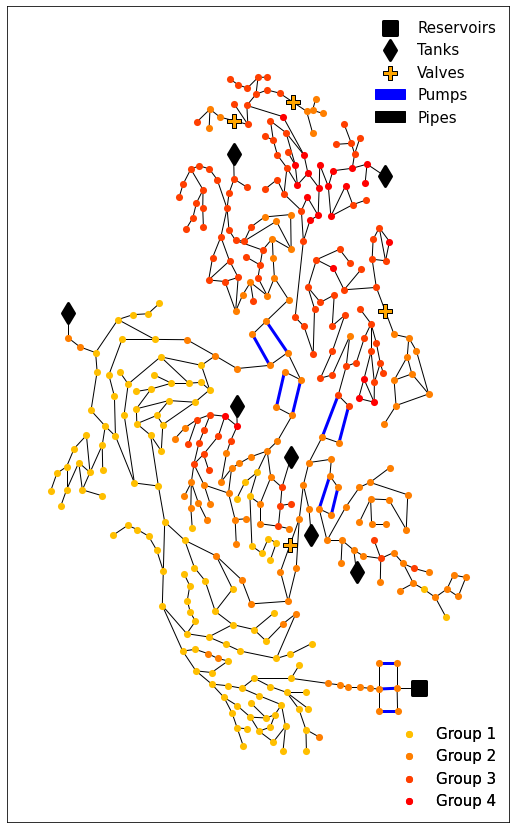

In [16]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation with custom bin labels.
vis.plot_discrete_nodes(model, ax, parameter='elevation', bin_label_list=['Group 1', 'Group 2', 'Group 3', 'Group 4'])

## <span style="color:dodgerblue"> 2.5 Creating A Discrete Nodes Plot - Legend Arguments

### The available legend arguments are legend, legend_title, legend_loc_1, and legend_loc_2. 

### legend determines if the legend is drawn, while legend_title determines the legend title of the bin legend only. legend_loc_1 determines the location of the 1st legend, which includes all the basic elements such as pumps or tanks, while legend_loc_2 determines the location of the bin legend.

### <span style="color:mediumseagreen"> 2.5.1 Using legend Argument

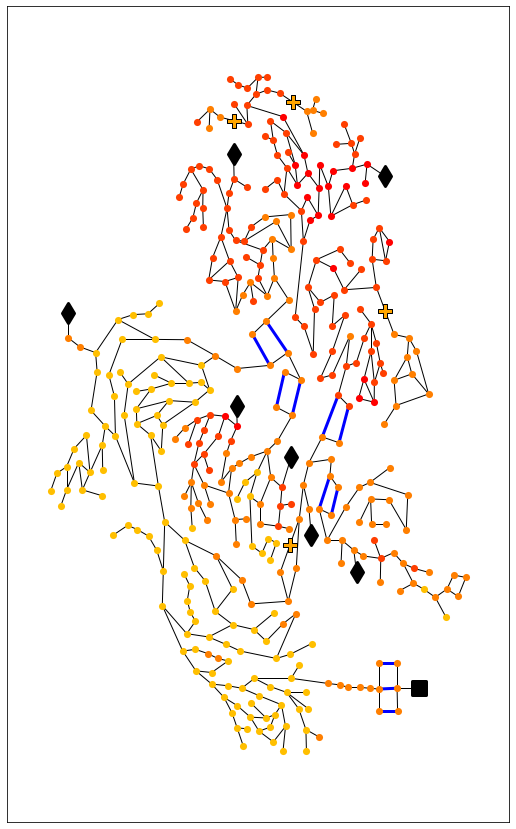

In [17]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation, but doesn't draw the legend.
vis.plot_discrete_nodes(model, ax, parameter='elevation', legend=False)

### <span style="color:mediumseagreen"> 2.5.2 Using legend_title Argument

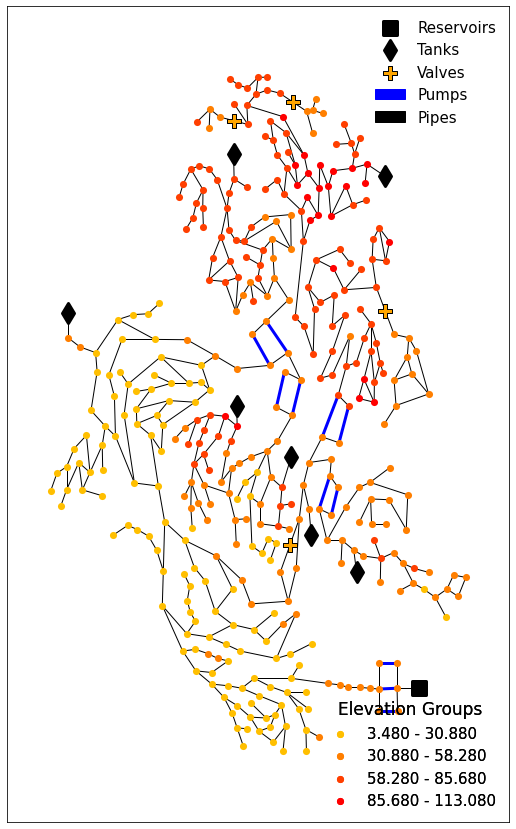

In [18]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation, but doesn't draw the legend.
vis.plot_discrete_nodes(model, ax, parameter='elevation', legend_title="Elevation Groups")

### <span style="color:mediumseagreen"> 2.5.3 Using Legend Location Arguments

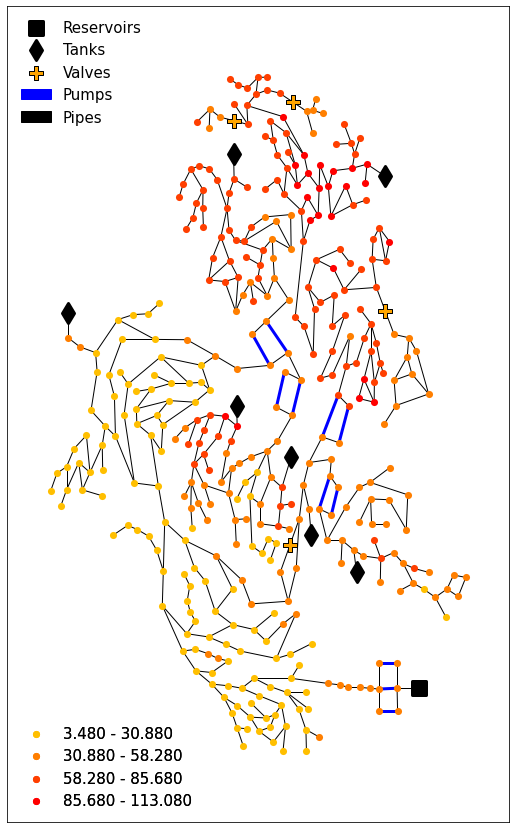

In [19]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation, but doesn't draw the legend.
vis.plot_discrete_nodes(model, ax, parameter='elevation', legend_loc_1='upper left', legend_loc_2='lower left')

## <span style="color:dodgerblue"> 2.6 Creating a Discrete Nodes Plot - Color Mapping
    
### The Arguments cmap and color_list are used to color the nodes by what bin they are in. The default cmap for all functions is 'autumn_r' and color_list is set to None. cmap is useful for automatically coloring bins according to a color scheme, but for more percise control of the colors of each bin, color_list should be used. If using color_list, cmap must be set to None.
    
### <span style="color:mediumseagreen"> 2.6.1 Using cmap Argument

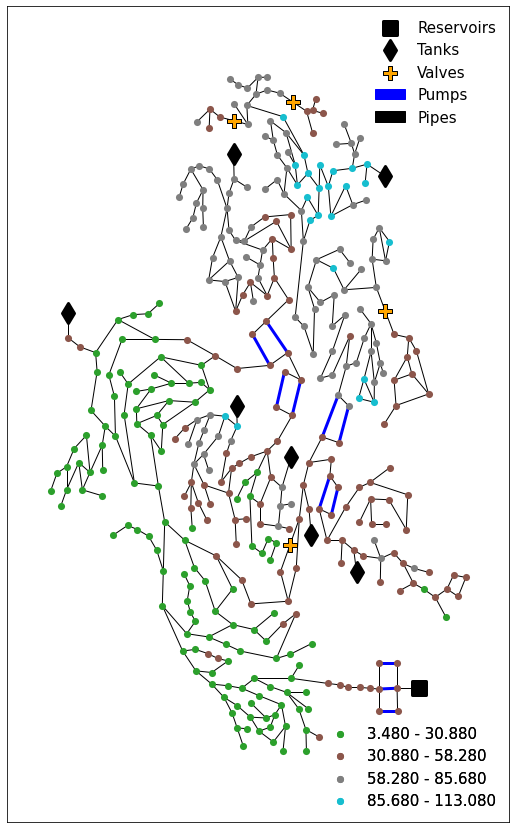

In [20]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation using tab10 cmap.
vis.plot_discrete_nodes(model, ax, parameter='elevation', cmap='tab10')

### <span style="color:mediumseagreen"> 2.6.2 Using color_list Argument

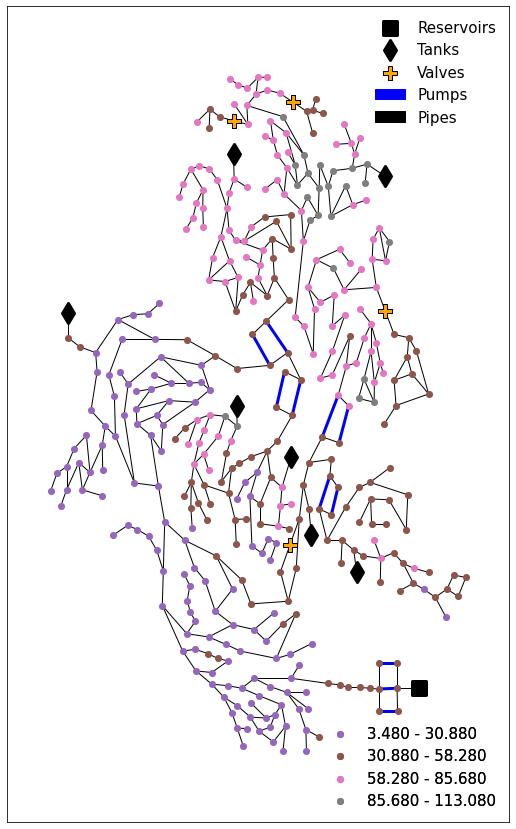

In [21]:
#Defines a matplotlib figure and axis. The user can customize the size of the plot in this way.
fig, ax = plt.subplots(figsize = (9,15))

#Creates discrete nodes plot of elevation using custom color list.
vis.plot_discrete_nodes(model, ax, parameter='elevation', cmap=None,
                        color_list=['#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])